# Morfologia Matemática
### Carregando as imagens

In [33]:
import cv2
import glob
from pathlib import Path
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown

In [34]:
def open_img(image_path):
    """
            Funcao responsavel por carregar imagens de um diretorio
            Arguments:
              image_path: Caminho do diretorio das imagens
            Return:
              dataset: Vetor, onde cada posição possui uma imagem carregada do diretório
        """
    dataset = []
    #carrega as imagens do diretorio
    for i in glob.glob(image_path + '/*.png', recursive=True):
        dataset.append(cv2.imread(i))
    for j in glob.glob(image_path + '/*.jpg', recursive=True):
        dataset.append(cv2.imread(j))
    # for k in glob.glob(image_path + '/*.gif', recursive=True):
    #     dataset.append(cv2.imread(k))

    return dataset

def show(pos,image,title):
  plt.subplot(pos)
  plt.imshow(image)
  plt.title(title)
  plt.axis('off')

In [35]:
dataset_gray = open_img('../dataset/imgs_cinza/')
dataset_binary = open_img('../dataset/imgs_pb/')

## Elementos estruturantes

In [36]:
quadrado_3x3 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
quadrado_5x5 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
quadrado_7x7 = cv2.getStructuringElement(cv2.MORPH_RECT,(7,7))

elipse_5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))
elipse_7x7 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
elipse_11x11 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(11,11))

linha_3x3 = np.array([[0,1,0],
                      [0,1,0],
                      [0,1,0]
            ],dtype=np.uint8)

linha_5x5 = np.array([[0,0,1,0,0],
                      [0,0,1,0,0],
                      [0,0,1,0,0],
                      [0,0,1,0,0],
                      [0,0,1,0,0]
            ],dtype=np.uint8)

linha_7x7 = np.array([[0,0,0,1,0,0,0],
                      [0,0,0,1,0,0,0],
                      [0,0,0,1,0,0,0],
                      [0,0,0,1,0,0,0],
                      [0,0,0,1,0,0,0],
                      [0,0,0,1,0,0,0],
                      [0,0,0,1,0,0,0]
            ],dtype=np.uint8)

In [37]:
def operations(image, struturing_element,name_element):
    img_erosion = cv2.erode(image, struturing_element, iterations=2)
    img_dilation = cv2.dilate(image, struturing_element, iterations=2)
    img_open = cv2.morphologyEx(image, cv2.MORPH_OPEN, struturing_element)
    img_close = cv2.morphologyEx(image, cv2.MORPH_CLOSE, struturing_element)

    display(Markdown(f'### {name_element}'))

    #Visualização
    plt.figure(figsize=(12,8))
    plt.axis('off')

    show(151,image,'Original')
    show(152,img_erosion,'Erosão')
    show(153,img_dilation,'Dilatação')
    show(154,img_open,'Abertura')
    show(155,img_close,'Fechamento')

    plt.show()

In [38]:
def show_all_operations(image):
    # Quadrado 
    operations(image, quadrado_3x3,'Quadrado 3x3')
    operations(image, quadrado_5x5,'Quadrado 5x5')
    operations(image, quadrado_7x7,'Quadrado 7x7')

    #Elipse
    operations(image, elipse_5x5,'Elipse 5x5')
    operations(image, elipse_7x7,'Elipse 7x7')
    operations(image, elipse_11x11,'Elipse 11x11')

    #Linha
    operations(image, linha_3x3,'Linha 3x3')
    operations(image, linha_5x5,'Linha 5x5')
    operations(image, linha_7x7,'Linha 7x7')

In [42]:
image_gray = dataset_gray[2]
image_binary = dataset_binary[2]

### Quadrado 3x3

C:\Users\stefane.santos\AppData\Local\Temp\ipykernel_11612\2568539113.py:21: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(pos)


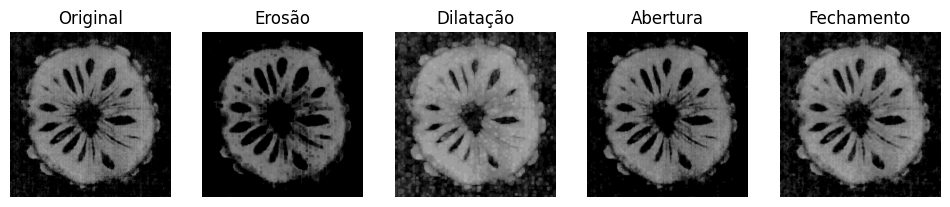

### Quadrado 5x5

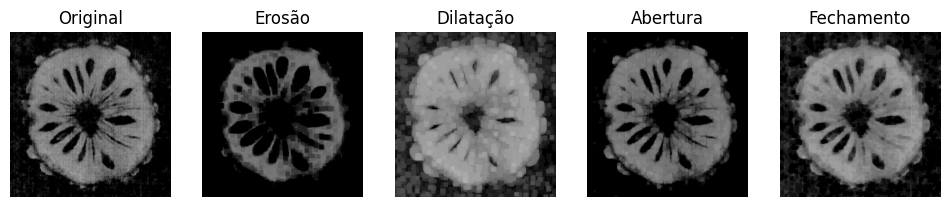

### Quadrado 7x7

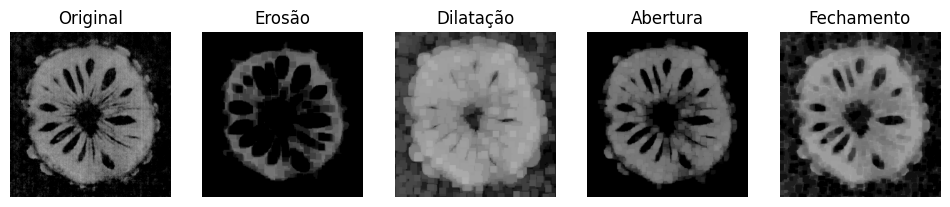

### Elipse 5x5

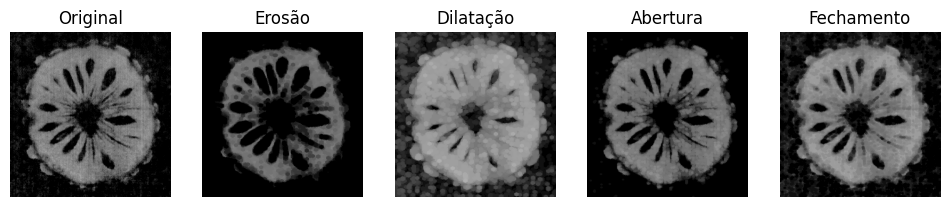

### Elipse 7x7

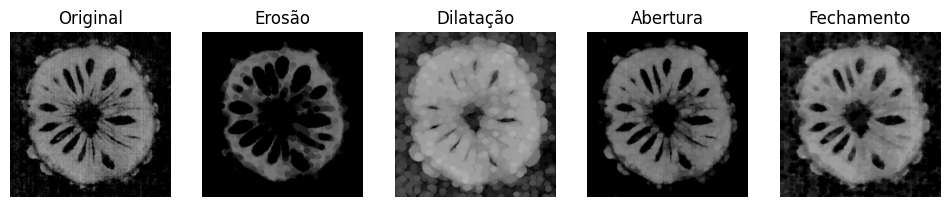

### Elipse 11x11

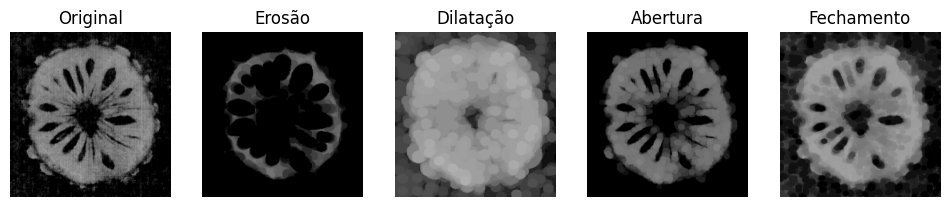

### Linha 3x3

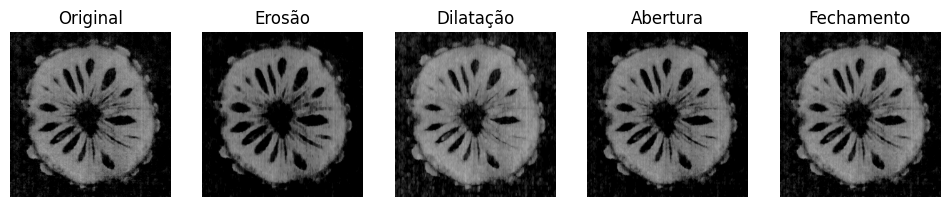

### Linha 5x5

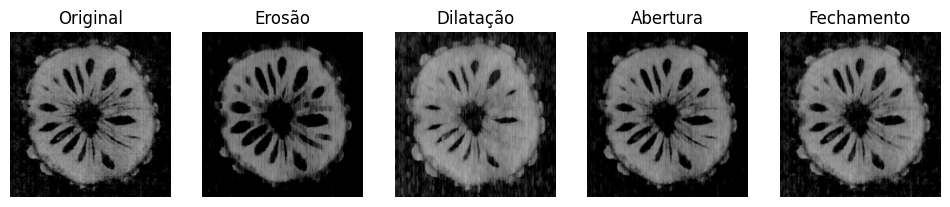

### Linha 7x7

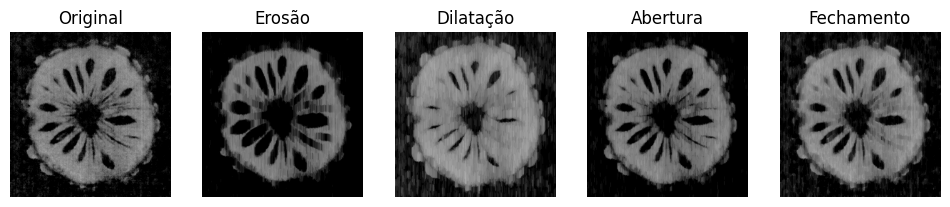

In [43]:
show_all_operations(image_gray)